In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
data=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',
                            extract=True,origin=url)
path=os.path.join(os.path.dirname(data),'cats_and_dogs_filtered')
print(path)
train_dir=os.path.join(path,'train')
val_dir=os.path.join(path,'validation')
print(train_dir)
print(val_dir)

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
# load a data
BATCH_SIZE=32
IMG_SIZE=(160,160)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


(32, 160, 160, 3)
(32,)
tf.Tensor([0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1], shape=(32,), dtype=int32)


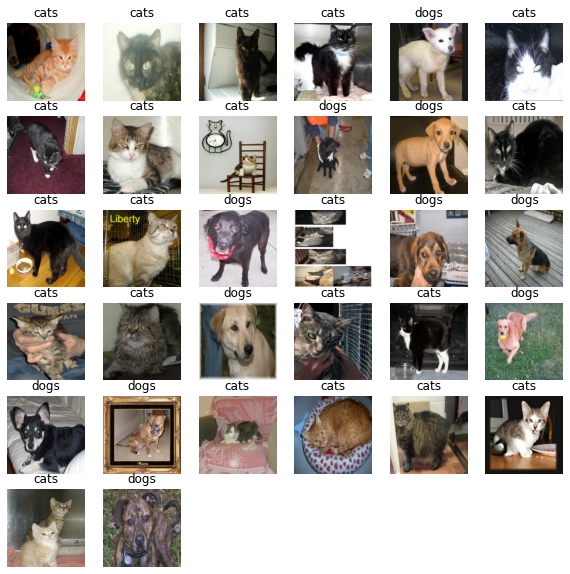

In [ ]:
# a single batch
# visulize
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(6,6,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

(299, 299, 3)
(1, 299, 299, 3)


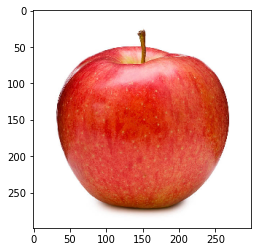

In [ ]:
# PROJECT -1 , TL AS IT IS
import tensorflow as tf
dir='/content/drive/MyDrive/ALL_DS/apple.jpg'
image=tf.keras.preprocessing.image.load_img(dir,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(image)
print(img.shape)
plt.imshow(img/255)
img1=tf.expand_dims(img,axis=0)
print(img1.shape)

In [ ]:
model=tf.keras.applications.inception_v3.InceptionV3()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

In [ ]:
img2=tf.keras.applications.inception_v3.preprocess_input(img1)
y=model.predict(img2)
label=tf.keras.applications.inception_v3.decode_predictions(y)
print(label)

[[('n07742313', 'Granny_Smith', 0.5085651), ('n07768694', 'pomegranate', 0.08880548), ('n07747607', 'orange', 0.033938065), ('n07753592', 'banana', 0.009284665), ('n03804744', 'nail', 0.0043151416)]]


In [40]:
# load a pretrained NN
base_model=tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                include_top=False,weights='imagenet')
base_model.trainable=False # freeze the model for training
print('Number of layers=',len(base_model.layers))
print('Number of weights[W/B]=',len(base_model.weights))
print('Number of trainable variables=',len(base_model.trainable_variables))
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Number of layers= 154
Number of weights[W/B]= 260
Number of trainable variables= 0
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_5[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                

In [41]:
# custom model
inputs=tf.keras.Input(shape=(160,160,3)) # input layer
x=base_model(inputs,training=False)           # base model
###############################################
x=tf.keras.layers.GlobalAveragePooling2D()(x) # Nonex1280
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(2)(x) # outer layer 1 neuron, 
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable

In [42]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
loss0,acc0=model.evaluate(test_ds)
print('Training Accuracy Before training=',acc0)

32/32 [==============================] - 18s 506ms/step - loss: 6.4663 - accuracy: 0.4570
Training Accuracy Before training= 0.4569999873638153


In [ ]:
initial_epochs=5
hist=model.fit(train_ds,epochs=initial_epochs)
loss1,acc1=model.evaluate(test_ds)
print('Training Accuracy after training=',acc1)

Epoch 1/5
63/63 [==============================] - 32s 465ms/step - loss: 7.6313 - accuracy: 0.4955
Epoch 2/5
43/63 [===================>..........] - ETA: 10s - loss: 7.6693 - accuracy: 0.4920